In [1]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import pandas as pd

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
data = pd.read_excel("NM390.xlsx")
df = data.copy()
df.head()

,Day,Month,Year,Latitude(in deg),Longitude(in Deg),Mixed Layer Depth (m),Sea Surface Temperature (in deg C),Sea Surface Salinity,U Velocity (m/s),V Velocity (m/s),Abs. Dynamic Topography (m)
0,31,JAN,2019,7.343,87.558,44.0,28.51,33.773,-0.733,-0.163,0.058
1,31,JAN,2019,9.452,89.781,46.0,28.21,33.077,-0.324,-0.103,0.031
2,30,JAN,2019,9.409,85.940,47.9,28.34,33.945,-0.052,-0.032,0.068
3,30,JAN,2019,17.700,88.783,25.2,25.66,32.095,-0.026,-0.018,0.115
4,29,JAN,2019,5.679,78.103,35.0,27.76,34.112,-0.511,-0.060,0.038


In [3]:
output_data = df["Mixed Layer Depth (m)"]

input_data = df.drop(columns = ["Day", "Month", "Year", "Mixed Layer Depth (m)"])

In [4]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size = 0.2)

x_train = preprocessing.scale(x_train)
x_test = preprocessing.scale(x_test)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


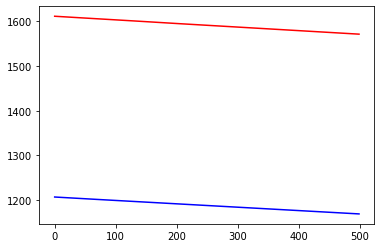

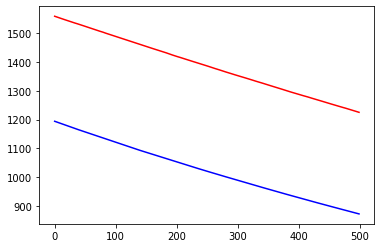

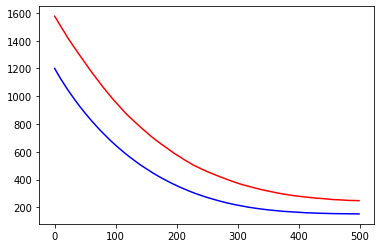

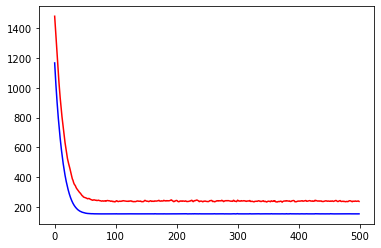

In [5]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]

for i in learning_rates :
    
    model = Sequential()
    model.add(Dense(1, input_shape = (input_data.shape[1], )))

    model.compile(Adam(lr = i), 'mean_squared_error')

    history = model.fit(x_train, y_train, epochs = 500, validation_split = 0.1, verbose = 0)
    history_dict = history.history
    
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    plt.figure()
    plt.plot(loss_values, 'b', label = 'training loss')
    plt.plot(val_loss_values, 'r', label = 'validation training loss')

In [6]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print("Training R2 score is - ", r2_score(y_train, y_train_pred))
print("Testing R2 score is - ", r2_score(y_test, y_test_pred))

Training R2 score is -  0.29856051137949435
Testing R2 score is -  0.28315523558944977


Epoch 00068: early stopping
Training R2 score is -  0.536628755087672
Testing R2 score is -  0.3620374657441825


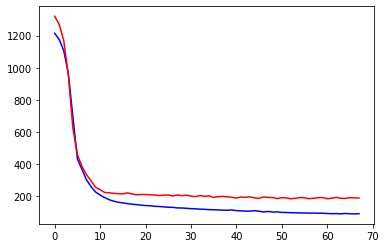

In [7]:
# DNN
model = Sequential()
model.add(Dense(30, input_shape = (input_data.shape[1], ), activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(1, ))
model.compile(Adam(lr = 0.003), 'mean_squared_error')

earlystopper = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 15, verbose = 1, mode = 'auto')

history = model.fit(x_train, y_train, epochs = 1000, validation_split = 0.2, shuffle = True, verbose = 0, 
                    callbacks = [earlystopper])
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
plt.figure()
plt.plot(loss_values, 'b', label = 'training loss')
plt.plot(val_loss_values, 'r', label = 'validation training loss')

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print("Training R2 score is - ", r2_score(y_train, y_train_pred))
print("Testing R2 score is - ", r2_score(y_test, y_test_pred))

<Figure size 432x288 with 0 Axes>

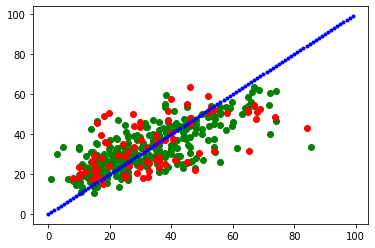

<Figure size 432x288 with 0 Axes>

In [8]:
plt.plot(y_train, y_train_pred, 'og')
plt.plot(y_test, y_test_pred, 'or')

for i in range(100) :
    plt.plot(i, i, '.b')
    
plt.figure()